<a href="https://colab.research.google.com/github/fasthill/Hands_on_ML2/blob/main/03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3Ïû• ‚Äì Î∂ÑÎ•ò**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ 3Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†ú Ï†ïÎãµÏùÑ Îã¥Í≥† ÏûàÏäµÎãàÎã§._

# ÏÑ§Ï†ï

Î®ºÏ†Ä Î™á Í∞úÏùò Î™®ÎìàÏùÑ ÏûÑÌè¨Ìä∏Ìï©ÎãàÎã§. Îß∑ÌîåÎ°ØÎ¶Ω Í∑∏ÎûòÌîÑÎ•º Ïù∏ÎùºÏù∏ÏúºÎ°ú Ï∂úÎ†•ÌïòÎèÑÎ°ù ÎßåÎì§Í≥† Í∑∏Î¶ºÏùÑ Ï†ÄÏû•ÌïòÎäî Ìï®ÏàòÎ•º Ï§ÄÎπÑÌï©ÎãàÎã§. ÎòêÌïú ÌååÏù¥Ïç¨ Î≤ÑÏ†ÑÏù¥ 3.5 Ïù¥ÏÉÅÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§(ÌååÏù¥Ïç¨ 2.xÏóêÏÑúÎèÑ ÎèôÏûëÌïòÏßÄÎßå Í≥ß ÏßÄÏõêÏù¥ Ï§ëÎã®ÎêòÎØÄÎ°ú ÌååÏù¥Ïç¨ 3ÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§). ÏÇ¨Ïù¥ÌÇ∑Îü∞ Î≤ÑÏ†ÑÏù¥ 0.20 Ïù¥ÏÉÅÏù∏ÏßÄÎèÑ ÌôïÏù∏Ìï©ÎãàÎã§.

In [5]:
# ÌååÏù¥Ïç¨ ‚â•3.5 ÌïÑÏàò
import sys
assert sys.version_info >= (3, 5)

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ ‚â•0.20 ÌïÑÏàò
import sklearn
assert sklearn.__version__ >= "0.20"

# Í≥µÌÜµ Î™®Îìà ÏûÑÌè¨Ìä∏
import numpy as np
import pandas as pd
import os

# ÎÖ∏Ìä∏Î∂Å Ïã§Ìñâ Í≤∞Í≥ºÎ•º ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥
np.random.seed(42)

# ÍπîÎÅîÌïú Í∑∏ÎûòÌîÑ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Í∑∏Î¶ºÏùÑ Ï†ÄÏû•Ìï† ÏúÑÏπò
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Í∑∏Î¶º Ï†ÄÏû•:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [12]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=True Ïù¥Î©¥ dataframeÏúºÎ°ú Î∞òÌôòÌï®.
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
mnist['url']

'https://www.openml.org/d/554'

In [13]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

In [25]:
28 * 28

784

Í∑∏Î¶º Ï†ÄÏû•: some_digit_plot


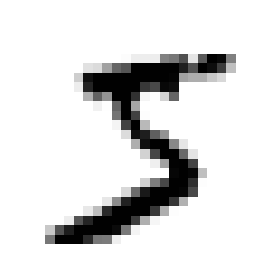

In [24]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary) # == cmap=binary, cmap='gray'
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [26]:
y[0]

'5'

In [27]:
y = y.astype(np.uint8) # unsigned integerÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏûÖÎ†•Ìï®. ÏïåÍ≥†Î¶¨Ï¶òÏóê Îî∞ÎùºÏÑú Î¨∏ÏûêÎ°ú ÎêòÏñ¥ ÏûàÏñ¥ÏÑú ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôòÌï¥ Ï§å.

In [31]:
int(str(5))

5

In [33]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [34]:
# Ïà´Ïûê Í∑∏Î¶ºÏùÑ ÏúÑÌïú Ï∂îÍ∞Ä Ìï®Ïàò
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) ÏôÄ ÎèôÏùºÌï©ÎãàÎã§:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # ÌïÑÏöîÌïòÎ©¥ Í∑∏Î¶¨Îìú ÎÅùÏùÑ Ï±ÑÏö∞Í∏∞ ÏúÑÌï¥ Îπà Ïù¥ÎØ∏ÏßÄÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Î∞∞Ïó¥Ïùò ÌÅ¨Í∏∞Î•º Î∞îÍæ∏Ïñ¥ 28√ó28 Ïù¥ÎØ∏ÏßÄÎ•º Îã¥ÏùÄ Í∑∏Î¶¨ÎìúÎ°ú Íµ¨ÏÑ±Ìï©ÎãàÎã§:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Ï∂ï 0(Ïù¥ÎØ∏ÏßÄ Í∑∏Î¶¨ÎìúÏùò ÏàòÏßÅÏ∂ï)Í≥º 2(Ïù¥ÎØ∏ÏßÄÏùò ÏàòÏßÅÏ∂ï)Î•º Ìï©ÏπòÍ≥† Ï∂ï 1Í≥º 3(Îëê ÏàòÌèâÏ∂ï)ÏùÑ Ìï©Ïπ©ÎãàÎã§. 
    # Î®ºÏ†Ä transpose()Î•º ÏÇ¨Ïö©Ìï¥ Í≤∞Ìï©ÌïòÎ†§Îäî Ï∂ïÏùÑ ÏòÜÏúºÎ°ú Ïù¥ÎèôÌïú Îã§Ïùå Ìï©Ïπ©ÎãàÎã§:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # ÌïòÎÇòÏùò ÌÅ∞ Ïù¥ÎØ∏ÏßÄÎ•º ÏñªÏóàÏúºÎØÄÎ°ú Ï∂úÎ†•ÌïòÎ©¥ Îê©ÎãàÎã§:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Í∑∏Î¶º Ï†ÄÏû•: more_digits_plot


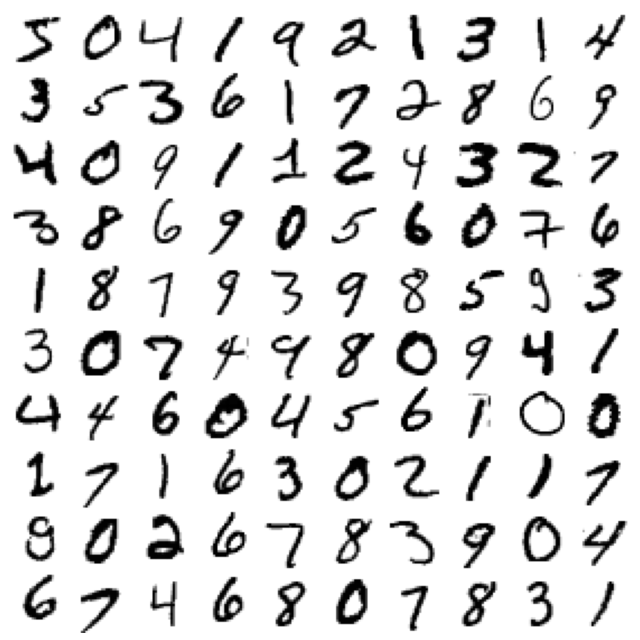

In [35]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [ ]:
y[0]

5

In [36]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®

In [42]:
y_train_5 = (y_train == 5)  # Ïù¥ÏßÑ Î∂ÑÎ•òÍ∏∞ ÌõàÎ†®Ïù¥ÎØÄÎ°ú TrueÏôÄ FalseÏùò ÎëêÍ∞ÄÏßÄÎ°ú Î∂ÑÎ•òÎ•º ÏãúÏºú ÎÜìÏùå 
y_test_5 = (y_test == 5)

**ÎÖ∏Ìä∏**: `max_iter`ÏôÄ `tol` Í∞ôÏùÄ ÏùºÎ∂Ä Îß§Í∞úÎ≥ÄÏàòÎäî ÏÇ¨Ïù¥ÌÇ∑Îü∞ Îã§Ïùå Î≤ÑÏ†ÑÏóêÏÑú Í∏∞Î≥∏Í∞íÏù¥ Î∞îÎÄùÎãàÎã§. Î≤ÑÏ†ÑÏù¥ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÎçîÎùºÎèÑ Í≤∞Í≥ºÍ∞Ä Î∞îÎÄåÏßÄ ÏïäÎèÑÎ°ù ÏïÑÏòà ÎÇòÏ§ëÏóê Î∞îÎÄî Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìï¥ Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§. Î≤àÍ±∞Î°úÏõÄÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Ï±ÖÏóêÎäî Îî∞Î°ú ÌëúÏãúÌïòÏßÄ ÏïäÏïòÏäµÎãàÎã§.

In [43]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=0.001, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [44]:
sgd_clf.predict([some_digit])  # 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÏûÖÎ†•Ïù¥ ÎêòÎäî Í≤ÉÏù¥ Í∏∞Î≥∏Ïù¥ÎØÄÎ°ú Î¶¨Ïä§Ìä∏([]) Î°ú Í∞êÏã∏ÏÑú ÏûÖÎ†•Ìï®. 
# some_digit Ïà´ÏûêÍ∞Ä 5Ïù¥ÎØÄÎ°ú TrueÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏúºÎãà ÎßûÏùå.

array([ True])

In [47]:
sgd_clf.score(X_test, y_test_5)

0.9492

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, 
                         scoring='accuracy', cv=3 )
scores

array([0.95035, 0.96035, 0.9604 ])

# ÏÑ±Îä• Ï∏°Ï†ï

## ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏÇ¨Ïö©Ìïú Ï†ïÌôïÎèÑ Ï∏°Ï†ï

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [56]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # y_train_5Í∞Ä Í≥®Í≥†Î£® ÏÑûÏù¥ÎèÑÎ°ù stratified ÏãúÏºúÏ§å

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=skfolds)
scores

array([0.9669 , 0.91625, 0.96785])

```
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# shuffle=FalseÍ∞Ä Í∏∞Î≥∏Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê random_stateÎ•º ÏÇ≠Ï†úÌïòÎçòÏßÄ shuffle=TrueÎ°ú ÏßÄÏ†ïÌïòÎùºÎäî Í≤ΩÍ≥†Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§.
# 0.24Î≤ÑÏ†ÑÎ∂ÄÌÑ∞Îäî ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï† ÏòàÏ†ïÏù¥ÎØÄÎ°ú Ìñ•ÌõÑ Î≤ÑÏ†ÑÏùÑ ÏúÑÌï¥ shuffle=TrueÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§.
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

# Ïù¥Î†áÍ≤å Ìï† ÌïÑÏöîÏóÜÏù¥ ÏúÑ Ï≤òÎüº cross_val_scoreÏóêÏÑú cvÏóê ÎåÄÏ≤¥ÏãúÏºúÏ£ºÎ©¥ Îê®.
```

In [59]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [60]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

## Ïò§Ï∞® ÌñâÎ†¨

Ï†ïÌôïÎèÑÎßå Í∞ÄÏßÄÍ≥† Î∂ÑÎ•òÎ¨∏Ï†úÎ•º ÌååÏïÖÌï† Ïàò ÏóÜÏùå. ÏúÑÏóêÏÑú Ï≤òÎüº 90%Ïù¥ÏÉÅÏù¥ ÏùåÏÑ±(False)Ïù∏ Í≤ΩÏö∞ Î¨¥Ï°∞Í±¥ ÏùåÏÑ±Ïù¥ÎùºÍ≥† ÏÑ†ÌÉùÏùÑ ÌïúÎã§Î©¥ Ï†ïÌôïÎèÑÎäî 90%Ïù¥ÏÉÅÏù¥ Îê† Í≤ÉÏûÑ. Îî∞ÎùºÏÑú Îã§Î¶Ñ Î∞©Î≤ïÏùÑ ÏÑ†ÌÉùÌï¥Ïïº Ìï®.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

predict Í∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ïò§Ï∞® ÌñâÎ†¨ Í∞íÏùÑ Í≥ÑÏÇ∞

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5  # ÏòàÏ∏°Í∞íÏùÑ Ïã§Ï†úÍ∞íÍ≥º Í∞ôÏùÄ Í∞íÏúºÎ°ú ÌïòÏó¨ ÎπÑÍµê
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

<img src="https://raw.githubusercontent.com/fasthill/My-gist/main/data/picture/confusion_matrix.png" width="800"/> <br>

Recall (Ïû¨ÌòÑÏú®) = TP / ( TP + FN ) Ïã§Ï†ú ÏñëÏÑ± ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏñëÏÑ±ÏúºÎ°ú ÏÑ†ÌÉùÌïú ÎπÑÏú®<br>
Precision (Ï†ïÎ∞ÄÎèÑ) = TP / (TP + FP) ÏñëÏÑ±ÏúºÎ°ú ÏÑ†ÌÉùÌïú Í≤É Ï§ëÏóê Ïã§Ï†úÎ°ú ÏñëÏÑ±Ïù∏ ÎπÑÏú®

## Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®

In [65]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # Ï†ïÎ∞ÄÎèÑ, ÏûÖÎ†•Í∞íÏùò ÏàúÏÑú Ï§ëÏöîÌûò. (Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í)

0.8370879772350012

In [66]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [68]:
recall_score(y_train_5, y_train_pred)  # Ïû¨ÌòÑÏú®, ÏûÖÎ†•Í∞íÏùò ÏàúÏÑú Ï§ëÏöîÌûò. (Ïã§Ï†úÍ∞í, ÏòàÏ∏°Í∞í)

0.6511713705958311

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [72]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [74]:
f1_score(y_train_pred, y_train_5)

0.7325171197343846

In [73]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

```
precision_score(y_train_pred, y_train_5) 
0.6511713705958311
recall_score(y_train_pred, y_train_5) 
0.8370879772350012

ÏûÖÎ†• ÏàúÏÑúÍ∞Ä Î∞îÎÄåÎ©¥, Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏú®Ïù¥ Î∞îÎÄåÏñ¥ ÎÇòÏò¥

f1_score(y_train_pred, y_train_5)
0.7325171197343846

f1_scoreÎäî Í≤∞Í≥ºÍ∞Ä ÎèôÏùºÌï®.
```

ÎÖ∏Ìä∏: Ïù¥ Ï∂úÎ†•(Í∑∏Î¶¨Í≥† Ïù¥ ÎÖ∏Ìä∏Î∂ÅÍ≥º Îã§Î•∏ ÎÖ∏Ìä∏Î∂ÅÏùò Ï∂úÎ†•)Ïù¥ Ï±ÖÏùò ÎÇ¥Ïö©Í≥º Ï°∞Í∏à Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§. Í±±Ï†ïÌï† ÌïÑÏöî ÏóÜÏäµÎãàÎã§. Í¥úÏ∞ÆÏäµÎãàÎã§! Îã¨ÎùºÏßÄÎäî Ïù¥Ïú†Í∞Ä Î™áÍ∞ÄÏßÄ ÏûàÏäµÎãàÎã§:

* Ï≤´Ïß∏, ÏÇ¨Ïù¥ÌÇ∑Îü∞Í≥º Îã§Î•∏ ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§Ïù¥ Î∞úÏ†ÑÌïòÎ©¥ÏÑú ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ï°∞Í∏àÏî© Î≥ÄÍ≤ΩÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏñªÏñ¥ÏßÄÎäî Í≤∞Í¥èÍ∞íÏù¥ Î∞îÎÄî Ïàò ÏûàÏäµÎãàÎã§. ÏµúÏã† ÏÇ¨Ïù¥ÌÇ∑Îü∞ Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥(ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∂åÏû•Îê©ÎãàÎã§) Ï±ÖÏù¥ÎÇò Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÎßåÎì§ Îïå ÏÇ¨Ïö©Ìïú Î≤ÑÏ†ÑÍ≥º Îã§Î•º Í≤ÉÏù¥ÎØÄÎ°ú Ï∞®Ïù¥Í∞Ä ÎÇ©ÎãàÎã§. ÎÖ∏Ìä∏Î∂ÅÏùÄ ÏµúÏã†ÏúºÎ°ú ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎ†§Í≥† ÎÖ∏Î†•ÌïòÏßÄÎßå Ï±ÖÏùò ÎÇ¥Ïö©ÏùÄ Í∑∏Î†áÍ≤å Ìï† Ïàò ÏóÜÏäµÎãàÎã§.
* ÎëòÏß∏, ÎßéÏùÄ ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌôïÎ•†Ï†ÅÏûÖÎãàÎã§. Ï¶â Î¨¥ÏûëÏúÑÏÑ±Ïóê ÏùòÏ°¥Ìï©ÎãàÎã§. Ïù¥Î°†Ï†ÅÏúºÎ°ú ÏùòÏÇ¨ ÎÇúÏàòÎ•º ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÎÇúÏàú ÏÉùÏÑ±Í∏∞Ïóê ÏãúÎìú Í∞íÏùÑ ÏßÄÏ†ïÌïòÏó¨ ÏùºÍ¥ÄÎêú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§(random_state=42ÎÇò np.random.seed(42)Î•º Ï¢ÖÏ¢Ö Î≥¥Í≤å ÎêòÎäî Ïù¥Ïú†ÏûÖÎãàÎã§). ÌïòÏßÄÎßå Ïó¨Í∏∞ÏóêÏÑú Ïñ∏Í∏âÌïú Îã§Î•∏ ÏöîÏù∏ÏúºÎ°ú Ïù∏Ìï¥ Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏùÑ ÎïåÍ∞Ä ÏûàÏäµÎãàÎã§.
* ÏÑ∏Ïß∏, ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏù¥ Ïó¨Îü¨ Ïä§Î†àÎìú(CÎ°ú Íµ¨ÌòÑÎêú ÏïåÍ≥†Î¶¨Ï¶ò)ÎÇò Ïó¨Îü¨ ÌîÑÎ°úÏÑ∏Ïä§(ÏòàÎ•º Îì§Ïñ¥ n_jobs Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï† Îïå)Î°ú Ïã§ÌñâÎêòÎ©¥ Ïó∞ÏÇ∞Ïù¥ Ïã§ÌñâÎêòÎäî Ï†ïÌôïÌïú ÏàúÏÑúÍ∞Ä Ìï≠ÏÉÅ Î≥¥Ïû•ÎêòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Í≤∞Í¥èÍ∞íÏù¥ Ï°∞Í∏à Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.
* ÎßàÏßÄÎßâÏúºÎ°ú, Ïó¨Îü¨ ÏÑ∏ÏÖòÏóê Í≤∞Ï≥ê ÏàúÏÑúÍ∞Ä Î≥¥Ïû•ÎêòÏßÄ ÏïäÎäî ÌååÏù¥Ïç¨ ÎîïÏÖîÎÑàÎ¶¨(dict)Ïù¥ÎÇò ÏÖã(set) Í∞ôÏùÄ Í≤ÉÏùÄ ÏôÑÎ≤ΩÌïú Ïû¨ÌòÑÏÑ±Ïù¥ Î∂àÍ∞ÄÎä•Ìï©ÎãàÎã§. ÎòêÌïú ÎîîÎ†âÌÜ†Î¶¨ ÏïàÏóê ÏûàÎäî ÌååÏùºÏùò ÏàúÏÑúÎèÑ Î≥¥Ïû•ÎêòÏßÄ ÏïäÏäµÎãàÎã§.

## Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú® Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ

In [76]:
y_scores = sgd_clf.decision_function([some_digit]) # decision functionÏù¥ + Ïù¥Î©¥ ÏñëÏÑ± ÌÅ¥ÎûòÏä§, - Ïù¥Î©¥ ÏùåÏÑ± ÌÅ¥ÎùºÏä§Î°ú ÎÇòÏò¥.
y_scores

array([2164.22030239])

Ï∂úÎ†•Í∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ ÏñëÏÑ± ÌÅ¥ÎùºÏä§Î°ú Î∂ÑÎ•òÌïòÍ≥† 0Î≥¥Îã§ ÎßéÏù¥ ÌÅ¨Î©¥ ÏñëÏÑ±ÌÅ¥ÎùºÏä§ÎùºÍ≥† ÌÅ¨Í≤å Í∞ïÏ°∞ÌïòÎäî Í≤É

In [77]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [79]:
y_some_digit_pred

array([False])

In [78]:
threshold = 8000  # threshold Í∞íÏùÑ ÎÜíÏù¥Î©¥ ÏùåÏÑ±ÏúºÎ°ú Î∞îÎÄú.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [80]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")  # decision_functionÏùÑ ÏßÄÏ†ïÌïòÎ©¥ Ïù¥ Í∞íÏùÑ y_scoreÏóê Î∞òÌôòÌï®.

In [81]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [82]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 
# Í≤∞Ï†ïÍ≥ÑÏàò(threshold) Í∞íÏùÄ Ï§ëÎ≥µÏù¥ Ï†úÍ±∞ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÍ≤å ÌëúÏãúÎêòÍ≥†, precisions, recallsÎäî thresholdÎ≥¥Îã§ 1Ïù¥ ÌÅ¨Í≤å ÎêòÍ≥† ÎßàÏßÄÎßâ Í∞íÏùÄ 1, 0ÏúºÎ°ú Í∞ÅÍ∞Å Ï±ÑÏõåÏßê

Í∑∏Î¶º Ï†ÄÏû•: precision_recall_vs_threshold_plot


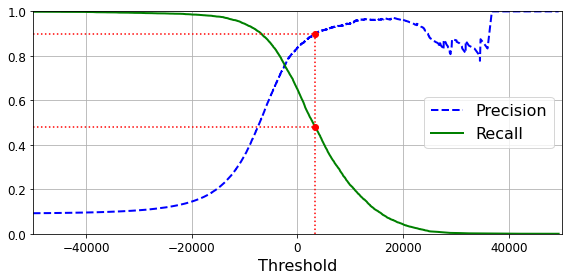

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [84]:
(y_train_pred == (y_scores > 0)).all()

True

Í∑∏Î¶º Ï†ÄÏû•: precision_vs_recall_plot


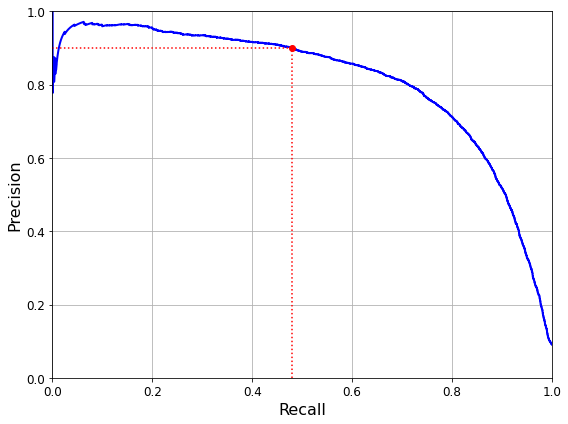

In [85]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

ROC Í≥°ÏÑ† ÏïÑÎûò Î©¥Ï†Å Íµ¨ÌïòÍ∏∞

In [93]:
from sklearn.metrics import average_precision_score

average_precision_score(y_train_5, y_scores)

0.810041762752646

In [86]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [87]:
threshold_90_precision

3370.0194991439557

In [88]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [89]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [90]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC Í≥°ÏÑ†

In [91]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Í∑∏Î¶º Ï†ÄÏû•: roc_curve_plot


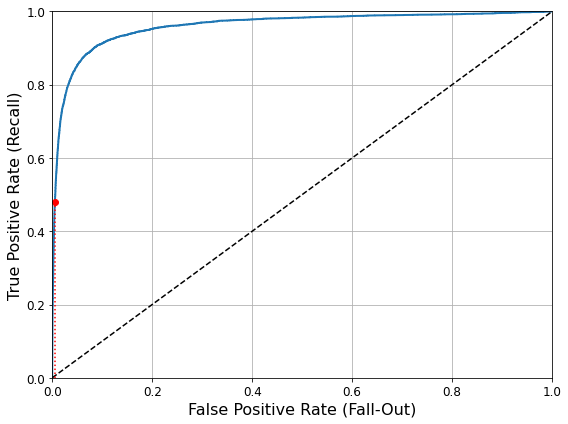

In [94]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # ÎåÄÍ∞Å Ï†êÏÑ†
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**ÎÖ∏Ìä∏**: ÏÇ¨Ïù¥ÌÇ∑Îü∞ 0.22 Î≤ÑÏ†ÑÏóêÏÑú Î∞îÎÄî Í∏∞Î≥∏ Í∞íÏùÑ ÏÇ¨Ïö©Ìï¥ `n_estimators=100`Î°ú ÏßÄÏ†ïÌï©ÎãàÎã§.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # Ï†êÏàò = ÏñëÏÑ± ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Í∑∏Î¶º Ï†ÄÏû•: roc_curve_comparison_plot


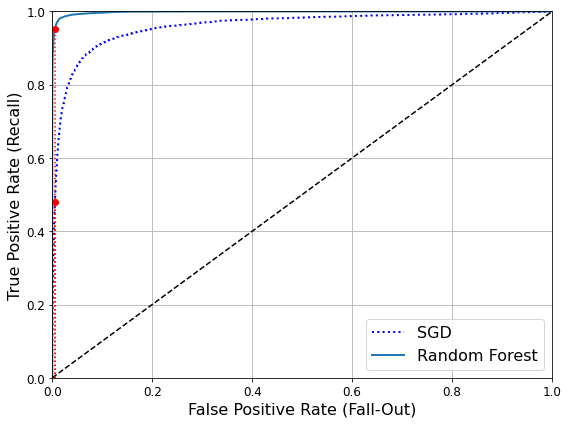

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Îã§Ï§ë Î∂ÑÎ•ò

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train_5Ïù¥ ÏïÑÎãàÎùº y_trainÏûÖÎãàÎã§
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå Îëê ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 30Î∂Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

# ÏóêÎü¨ Î∂ÑÏÑù

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

ÏÇ¨Ïù¥ÌÇ∑Îü∞ 0.22 Î≤ÑÏ†ÑÎ∂ÄÌÑ∞Îäî `sklearn.metrics.plot_confusion_matrix()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Í∑∏Î¶º Ï†ÄÏû•: confusion_matrix_plot


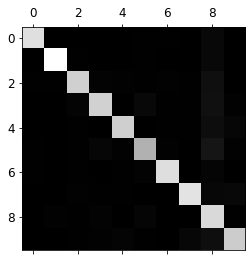

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Í∑∏Î¶º Ï†ÄÏû•: confusion_matrix_errors_plot


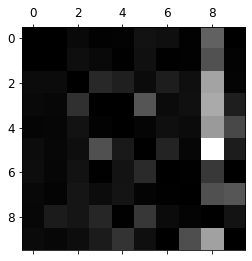

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Í∑∏Î¶º Ï†ÄÏû•: error_analysis_digits_plot


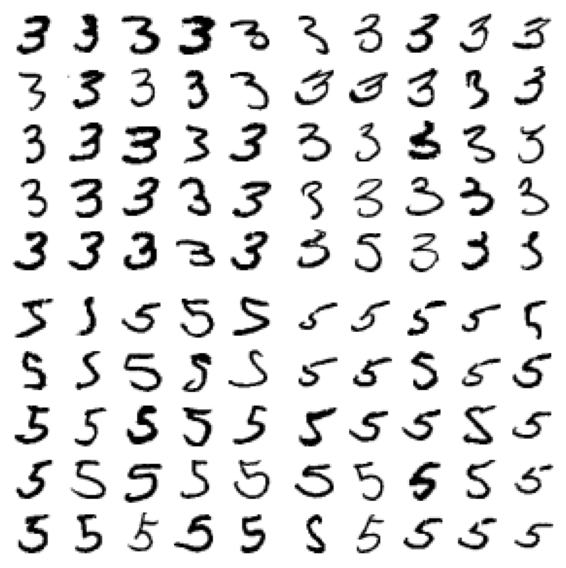

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Îã§Ï§ë Î†àÏù¥Î∏î Î∂ÑÎ•ò

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

**Í≤ΩÍ≥†**: Îã§Ïùå ÏÖÄÏùÄ Ïã§ÌñâÌïòÎäîÎç∞ Îß§Ïö∞ Ïò§Îûò Í±∏Î¶ΩÎãàÎã§(ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Î™á ÏãúÍ∞ÑÏù¥ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§).

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

# Îã§Ï§ë Ï∂úÎ†• Î∂ÑÎ•ò

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Í∑∏Î¶º Ï†ÄÏû•: noisy_digit_example_plot


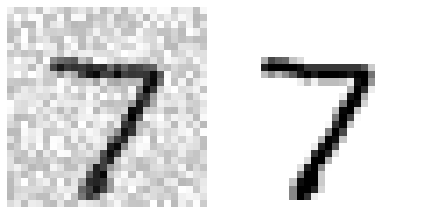

In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Í∑∏Î¶º Ï†ÄÏû•: cleaned_digit_example_plot


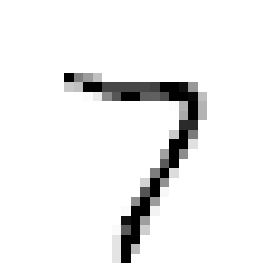

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Ï∂îÍ∞Ä ÎÇ¥Ïö©

## ÎçîÎØ∏ (Ï¶â ÎûúÎç§) Î∂ÑÎ•òÍ∏∞

In [ ]:
from sklearn.dummy import DummyClassifier
# 0.24Î≤ÑÏ†ÑÎ∂ÄÌÑ∞ strategyÏùò Í∏∞Î≥∏Í∞íÏù¥ 'stratified'ÏóêÏÑú 'prior'Î°ú Î∞îÎÄåÎØÄÎ°ú Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
dmy_clf = DummyClassifier(strategy='prior')
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

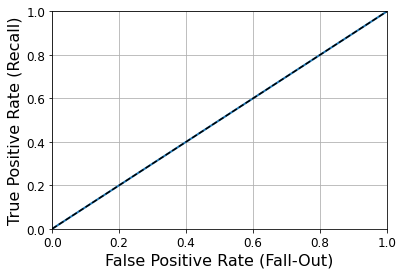

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN Î∂ÑÎ•òÍ∏∞

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

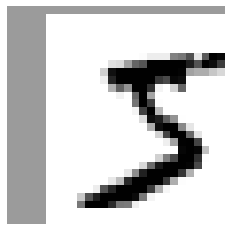

In [ ]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.24579675, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.75420325]])

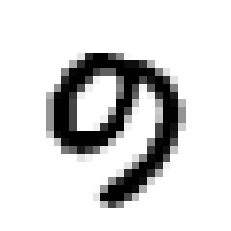

In [ ]:
plot_digit(ambiguous_digit)

# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. 97% Ï†ïÌôïÎèÑÏùò MNIST Î∂ÑÎ•òÍ∏∞

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 16ÏãúÍ∞Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  17.8s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  17.4s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  17.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  17.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  17.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  17.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  17.6s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  16.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  17.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  17.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  20.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.9716166666666666

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

## 2. Îç∞Ïù¥ÌÑ∞ Ï¶ùÏãù

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

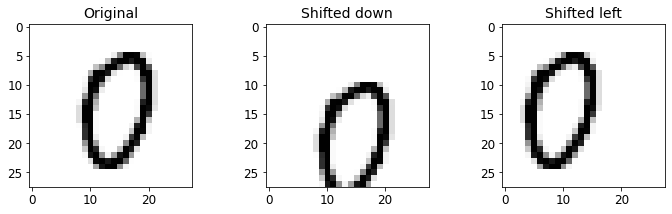

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

**Í≤ΩÍ≥†**: ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäîÎç∞ 1ÏãúÍ∞Ñ ÎòêÎäî Í∑∏ Ïù¥ÏÉÅ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

Í∞ÑÎã®Ìûà Îç∞Ïù¥ÌÑ∞Î•º Ï¶ùÏãùÌï¥ÏÑú 0.5% Ï†ïÌôïÎèÑÎ•º ÎÜíÏòÄÏäµÎãàÎã§. :)

## 3. ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ÏÖã ÎèÑÏ†Ñ

ÏäπÍ∞ùÏùò ÎÇòÏù¥, ÏÑ±Î≥Ñ, ÏäπÍ∞ù Îì±Í∏â, ÏäπÏÑ† ÏúÑÏπò Í∞ôÏùÄ ÏÜçÏÑ±ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïòÏó¨ ÏäπÍ∞ùÏùò ÏÉùÏ°¥ Ïó¨Î∂ÄÎ•º ÏòàÏ∏°ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§.

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌï¥ Î≥¥Ï£†:

In [ ]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()   

In [ ]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Î†àÏù¥Î∏îÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏßÄ ÏïäÏäµÎãàÎã§: ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ Í∞ÄÎä•Ìïú ÏµúÍ≥†Ïùò Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ Ï∫êÍ∏Ä(Kaggle)Ïóê ÏóÖÎ°úÎìúÌïòÏó¨ ÏµúÏ¢Ö Ï†êÏàòÎ•º ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Î™©ÌëúÏûÖÎãàÎã§.

ÌõàÎ†® ÏÑ∏Ìä∏ÏóêÏÑú Îß® ÏúÑ Î™á Í∞úÏùò Ïó¥ÏùÑ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

ÏÜçÏÑ±ÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏùòÎØ∏Î•º Í∞ÄÏßëÎãàÎã§:
* **PassengerId**: Í∞Å ÏäπÍ∞ùÏùò Í≥†Ïú† ÏãùÎ≥ÑÏûê.
* **Survived**: ÌÉÄÍπÉÏûÖÎãàÎã§. 0ÏùÄ ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌïú Í≤ÉÏù¥Í≥† 1ÏùÄ ÏÉùÏ°¥ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
* **Pclass**: ÏäπÍ∞ù Îì±Í∏â. 1, 2, 3Îì±ÏÑù.
* **Name**, **Sex**, **Age**: Ïù¥Î¶Ñ Í∑∏ÎåÄÎ°ú ÏùòÎØ∏ÏûÖÎãàÎã§.
* **SibSp**: Ìï®Íªò ÌÉëÏäπÌïú ÌòïÏ†ú, Î∞∞Ïö∞ÏûêÏùò Ïàò.
* **Parch**: Ìï®Íªò ÌÉëÏäπÌïú ÏûêÎÖÄ, Î∂ÄÎ™®Ïùò Ïàò.
* **Ticket**: Ìã∞Ïºì ÏïÑÏù¥Îîî
* **Fare**: Ìã∞Ïºì ÏöîÍ∏à (ÌååÏö¥Îìú)
* **Cabin**: Í∞ùÏã§ Î≤àÌò∏
* **Embarked**: ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌïú Í≥≥. C(Cherbourg), Q(Queenstown), S(Southampton)

`PassengerId` Ïó¥ÏùÑ Ïù∏Îç±Ïä§ Ïó¥Î°ú ÏßÄÏ†ïÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò ÎêòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

Ï¢ãÏäµÎãàÎã§. **Age**, **Cabin**, **Embarked** ÏÜçÏÑ±Ïùò ÏùºÎ∂ÄÍ∞Ä nullÏûÖÎãàÎã§(891Í∞úÏùò non-null Î≥¥Îã§ ÏûëÏäµÎãàÎã§). ÌäπÌûà **Cabin**ÏùÄ 77%Í∞Ä nullÏûÖÎãàÎã§. ÏùºÎã® **Cabin**ÏùÄ Î¨¥ÏãúÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎ•º ÌôúÏö©ÌïòÍ≤†ÏäµÎãàÎã§. **Age**Îäî 19%Í∞Ä nullÏù¥ÎØÄÎ°ú Ïù¥Î•º Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨Ìï†ÏßÄ Í≤∞Ï†ïÌï¥Ïïº Ìï©ÎãàÎã§. nullÏùÑ Ï§ëÍ∞Ñ ÎÇòÏù¥Î°ú Î∞îÍæ∏Îäî Í≤ÉÏù¥ Í¥úÏ∞ÆÏïÑ Î≥¥ÏûÖÎãàÎã§. Îã§Î•∏ Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎÇòÏù¥Î•º ÏòàÏ∏°ÌïòÎäî Í≤É(ÏòàÎ•º Îì§Ïñ¥, 1Îì±ÏÑùÏùò Ï§ëÍ∞Ñ ÎÇòÏù¥Îäî 37, 2Îì±ÏÑùÏùÄ 29, 3Îì±ÏÑùÏùÄ 24ÏûÖÎãàÎã§)Ïù¥ Ï°∞Í∏à ÌòÑÎ™ÖÌï¥ Î≥¥Ïùº Ïàò ÏûàÏßÄÎßå Îã®ÏàúÌï®ÏùÑ ÏúÑÌï¥ Ï†ÑÏ≤¥Ïùò Ï§ëÍ∞Ñ ÎÇòÏù¥Î•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

**Name**Í≥º **Ticket** ÏÜçÏÑ±ÎèÑ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏßÄÎßå Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïù¥ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎäî Ïà´ÏûêÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ÉÏù¥ Ï°∞Í∏à ÍπåÎã§Î°≠ÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÏßÄÍ∏àÏùÄ Ïù¥ Îëê ÏÜçÏÑ±ÏùÑ Î¨¥ÏãúÌïòÍ≤†ÏäµÎãàÎã§.

ÌÜµÍ≥ÑÏπòÎ•º ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

* Ïù¥ÌÅ¨, 38%Îßå **Survived**ÏûÖÎãàÎã§. üò≠ Í±∞Ïùò 40%Ïóê Í∞ÄÍπåÏö∞ÎØÄÎ°ú Ï†ïÌôïÎèÑÎ•º ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï¥ÎèÑ Í¥úÏ∞ÆÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.
* ÌèâÍ∑† **Fare**Îäî 32.20 ÌååÏö¥ÎìúÎùº Í∑∏Î†áÍ≤å ÎπÑÏã∏Î≥¥Ïù¥ÏßÄÎäî ÏïäÏäµÎãàÎã§(ÏïÑÎßà ÏöîÍ∏àÏùÑ ÎßéÏù¥ Î∞òÌôòÌï¥ Ï£ºÏóàÍ∏∞ ÎïåÎ¨∏Ïùº Í≤ÉÏûÖÎãàÎã§)
* ÌèâÍ∑† **Age**Îäî 30Î≥¥Îã§ ÏûëÏäµÎãàÎã§.

ÌÉÄÍπÉÏù¥ 0Í≥º 1Î°ú Ïù¥Î£®Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§:

In [ ]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Î≤îÏ£ºÌòï ÌäπÏÑ±Îì§ÏùÑ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Embarked** ÌäπÏÑ±ÏùÄ ÏäπÍ∞ùÏù¥ ÌÉëÏäπÌïú Í≥≥ÏùÑ ÏïåÎ†§ Ï§çÎãàÎã§: C=Cherbourg, Q=Queenstown, S=Southampton.

ÏàòÏπò ÌäπÏÑ±ÏùÑ ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏Î∂ÄÌÑ∞ ÏãúÏûëÌï¥ÏÑú Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥Ï£†:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

Ïù¥Ï†ú Î≤îÏ£ºÌòï ÌäπÏÑ±ÏùÑ ÏúÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì≠ÎãàÎã§:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

ÎßàÏßÄÎßâÏúºÎ°ú Ïà´ÏûêÏôÄ Î≤îÏ£ºÌòï ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ïó∞Í≤∞Ìï©ÎãàÎã§:

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

Ï¢ãÏäµÎãàÎã§! Ïù¥Ï†ú ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Ïóê Ï£ºÏûÖÌï† Ïà´Ïûê ÏûÖÎ†• ÌäπÏÑ±ÏùÑ Ï∂úÎ†•ÌïòÎäî Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§ÏóàÏäµÎãàÎã§.

In [ ]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

Î†àÏù¥Î∏îÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§:

In [ ]:
y_train = train_data["Survived"]

Ïù¥Ï†ú Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï∞®Î°ÄÏûÖÎãàÎã§. Î®ºÏ†Ä `RandomForestClassifier`Î•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Î™®Îç∏Ïù¥ Ïûò ÌõàÎ†®Îêú Í≤É Í∞ôÏäµÎãàÎã§. Ïù¥Î•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÎßåÎì≠ÎãàÎã§:

In [ ]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

Ïù¥ ÏòàÏ∏° Í≤∞Í≥ºÎ•º (Ï∫êÍ∏ÄÏóêÏÑú Í∏∞ÎåÄÌïòÎäî ÌòïÌÉúÏù∏) CSV ÌååÏùºÎ°ú ÎßåÎì§Ïñ¥ ÏóÖÎ°úÎìúÌïòÍ≥† ÌèâÍ∞ÄÎ•º Î∞õÏïÑÎ≥º Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Í∑∏ÎÉ• Ï¢ãÏùÑÍ±∞Îùº Í∏∞ÎåÄÌïòÎäî Í≤ÉÎ≥¥Îã§ ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú Î™®Îç∏Ïù¥ ÏñºÎßàÎÇò Ï¢ãÏùÄÏßÄ ÌèâÍ∞ÄÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8092759051186016

ÏïÑÏ£º ÎÇòÏÅòÏßÄ ÏïäÎÑ§Ïöî! Ï∫êÍ∏ÄÏóêÏÑú ÌÉÄÏù¥ÌÉÄÎãâ Í≤ΩÏó∞ ÎåÄÌöåÏùò [Î¶¨ÎçîÎ≥¥Îìú](https://www.kaggle.com/c/titanic/leaderboard)ÏóêÏÑú ÏÉÅÏúÑ 2% ÏïàÏóê Îì† Ï†êÏàòÎ•º Î≥º Ïàò ÏûàÏäµÎãàÎã§. ÏôÄÏö∞! Ïñ¥Îñ§ ÏÇ¨ÎûåÎì§ÏùÄ 100%Î•º Îã¨ÏÑ±ÌñàÏäµÎãàÎã§. ÌïòÏßÄÎßå ÌÉÄÏù¥ÌÉÄÎãâÏùò [Ìù¨ÏÉùÏûê Î™©Î°ù](https://www.encyclopedia-titanica.org/titanic-victims/)ÏùÑ ÏâΩÍ≤å Ï∞æÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú Î®∏Ïã†Îü¨ÎãùÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†ÎèÑ Ïù¥Îü∞ Ï†ïÌôïÎèÑÎ•º Îã¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§! üòÜ

`SVC`Î•º Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

Ï¢ãÎÑ§Ïöî! Ïù¥ Î™®Îç∏Ïù¥ Ìõ®Ïî¨ ÎÇòÏïÑÎ≥¥ÏûÖÎãàÎã§.

ÌïòÏßÄÎßå 10 Ìè¥Îìú ÍµêÏ∞® Í≤ÄÏ¶ùÏóê ÎåÄÌïú ÌèâÍ∑† Ï†ïÌôïÎèÑÎ•º Î≥¥Îäî ÎåÄÏã† Î™®Îç∏ÏóêÏÑú ÏñªÏùÄ 10Í∞úÏùò Ï†êÏàòÎ•º 1ÏÇ¨Î∂ÑÏúÑ, 3ÏÇ¨Î∂ÑÏúÑÎ•º Î™ÖÎ£åÌïòÍ≤å ÌëúÌòÑÌï¥Ï£ºÎäî ÏÉÅÏûê ÏàòÏóº Í∑∏Î¶º(box-and-whisker) Í∑∏ÎûòÌîÑÎ•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§(Ïù¥ Î∞©ÏãùÏùÑ Ï†úÏïàÌï¥ Ï§Ä Nevin YilmazÏóêÍ≤å Í∞êÏÇ¨Ìï©ÎãàÎã§). `boxplot()` Ìï®ÏàòÎäî Ïù¥ÏÉÅÏπò(ÌîåÎùºÏù¥Ïñ¥(flier)ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§)Î•º Í∞êÏßÄÌïòÍ≥† ÏàòÏóº Î∂ÄÎ∂ÑÏóê Ïù¥Î•º Ìè¨Ìï®ÏãúÌÇ§ÏßÄ ÏïäÏäµÎãàÎã§. 1ÏÇ¨Î∂ÑÏúÑÍ∞Ä $Q_1$Ïù¥Í≥† 3ÏÇ¨Î∂ÑÏúÑÍ∞Ä $Q_3$Ïù¥ÎùºÎ©¥ ÏÇ¨Î∂ÑÏúÑÏàò Î≤îÏúÑÎäî $IQR = Q_3 - Q_1$Í∞Ä Îê©ÎãàÎã§(Ïù¥ Í∞íÏù¥ Î∞ïÏä§Ïùò ÎÜíÏù¥Í∞Ä Îê©ÎãàÎã§). $Q_1 - 1.5 \times IQR$ Î≥¥Îã§ ÎÇÆÍ±∞ÎÇò $Q3 + 1.5 \times IQR$ Î≥¥Îã§ ÎÜíÏùÄ Ï†êÏàòÎäî Ïù¥ÏÉÅÏπòÎ°ú Í∞ÑÏ£ºÎê©ÎãàÎã§.

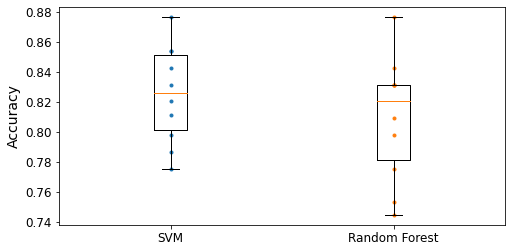

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Í∞Ä 10Í∞úÏùò Ìè¥Îìú Ï§ë ÌïòÎÇòÏóêÏÑú Îß§Ïö∞ ÎÜíÏùÄ Ï†êÏàòÎ•º ÏñªÏóàÏßÄÎßå ÎÑìÍ≤å ÌçºÏ†∏ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†ÑÏ≤¥Ï†ÅÏù∏ ÌèâÍ∑† Ï†êÏàòÎäî ÎÇÆÏäµÎãàÎã§. Îî∞ÎùºÏÑú SVM Î∂ÑÎ•òÍ∏∞Í∞Ä ÏùºÎ∞òÌôîÎ•º Îçî ÏûòÌïòÎäî Í≤É Í∞ôÏäµÎãàÎã§.

Ïù¥ Í≤∞Í≥ºÎ•º Îçî Ìñ•ÏÉÅÏãúÌÇ§Î†§Î©¥:
* ÍµêÏ∞® Í≤ÄÏ¶ùÍ≥º Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îçî ÎßéÏùÄ Î™®Îç∏ÏùÑ ÎπÑÍµêÌïòÍ≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌïòÏÑ∏Ïöî.
* ÌäπÏÑ± Í≥µÌïôÏùÑ Îçî ÏãúÎèÑÌï¥ Î≥¥ÏÑ∏Ïöî, ÏòàÎ•º Îì§Î©¥:
  * ÏàòÏπò ÌäπÏÑ±ÏùÑ Î≤îÏ£ºÌòï ÌäπÏÑ±ÏúºÎ°ú Î∞îÍæ∏Ïñ¥ Î≥¥ÏÑ∏Ïöî: ÏòàÎ•º Îì§Ïñ¥, ÎÇòÏù¥ÎåÄÍ∞Ä Îã§Î•∏ Í≤ΩÏö∞ Îã§Î•∏ ÏÉùÏ°¥ ÎπÑÏú®ÏùÑ Í∞ÄÏßà Ïàò ÏûàÏäµÎãàÎã§(ÏïÑÎûò Ï∞∏Ï°∞). Í∑∏Îü¨ÎØÄÎ°ú ÎÇòÏù¥ Íµ¨Í∞ÑÏùÑ Î≤îÏ£ºÎ°ú ÎßåÎì§Ïñ¥ ÎÇòÏù¥ ÎåÄÏã† ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏä§ÎãàÎã§. ÎπÑÏä∑ÌïòÍ≤å ÏÉùÏ°¥ÏûêÏùò 30%Í∞Ä ÌòºÏûê Ïó¨ÌñâÌïòÎäî ÏÇ¨ÎûåÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îì§ÏùÑ ÏúÑÌïú ÌäπÎ≥ÑÌïú Î≤îÏ£ºÎ•º ÎßåÎìúÎäî Í≤ÉÏù¥ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§(ÏïÑÎûò Ï∞∏Ï°∞).
  * **SibSp**ÏôÄ **Parch**ÏùÑ Ïù¥ Îëê ÌäπÏÑ±Ïùò Ìï©ÏúºÎ°ú Î∞îÍøâÎãàÎã§.
  * **Survived** ÌäπÏÑ±Í≥º Í¥ÄÎ†®Îêú Ïù¥Î¶ÑÏùÑ Íµ¨Î≥ÑÌï¥ Î≥¥ÏÑ∏Ïöî.
  * **Cabin** Ïó¥ÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî. ÏòàÎ•º Îì§Ïñ¥ Ï≤´ Í∏ÄÏûêÎ•º Î≤îÏ£ºÌòï ÏÜçÏÑ±Ï≤òÎüº Îã§Î£∞ Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

Survived
AgeBucket          
0.0        0.576923
15.0       0.362745
30.0       0.423256
45.0       0.404494
60.0       0.240000
75.0       1.000000

In [ ]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

Survived
RelativesOnboard          
0                 0.303538
1                 0.552795
2                 0.578431
3                 0.724138
4                 0.200000
5                 0.136364
6                 0.333333
7                 0.000000
10                0.000000

## 4. Ïä§Ìå∏ ÌïÑÌÑ∞

Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î∞õÏäµÎãàÎã§:

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(ham_url=HAM_URL, spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", ham_url), ("spam.tar.bz2", spam_url)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=spam_path)
        tar_bz2_file.close()

In [ ]:
fetch_spam_data()

Îã§Ïùå, Î™®Îì† Ïù¥Î©îÏùºÏùÑ ÏùΩÏñ¥ Îì§ÏûÖÎãàÎã§:

In [ ]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [ ]:
len(ham_filenames)

2500

In [ ]:
len(spam_filenames)

500

ÌååÏù¥Ïç¨Ïùò `email` Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥Î©îÏùºÏùÑ ÌååÏã±Ìï©ÎãàÎã§(Ìó§Îçî, Ïù∏ÏΩîÎî© Îì±ÏùÑ Ï≤òÎ¶¨Ìï©ÎãàÎã§):

In [ ]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [ ]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÏßÄ Í∞êÏùÑ Ïû°Í∏∞ ÏúÑÌï¥ ÌñÑ Î©îÏùºÍ≥º Ïä§Ìå∏ Î©îÏùºÏùÑ ÌïòÎÇòÏî© Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [ ]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


Ïñ¥Îñ§ Ïù¥Î©îÏùºÏùÄ Ïù¥ÎØ∏ÏßÄÎÇò Ï≤®Î∂Ä ÌååÏùºÏùÑ Í∞ÄÏßÑ Î©ÄÌã∞ÌååÌä∏(multipart)ÏûÖÎãàÎã§(Î©îÏùºÏóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùÑÏàò ÏûàÏäµÎãàÎã§). Ïñ¥Îñ§ ÌååÏùºÎì§Ïù¥ ÏûàÎäîÏßÄ ÏÇ¥Ìé¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [ ]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [ ]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [ ]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

ÌñÑ Î©îÏùºÏùÄ ÌèâÎ≤îÌïú ÌÖçÏä§Ìä∏Í∞Ä ÎßéÍ≥† Ïä§Ìå∏ÏùÄ HTMLÏùº Í≤ΩÏö∞Í∞Ä ÎßéÏäµÎãàÎã§. Ï†ÅÏùÄ ÏàòÏùò ÌñÑ Ïù¥Î©îÏùºÏù¥ PGPÎ°ú ÏÑúÎ™ÖÎêòÏñ¥ ÏûàÏßÄÎßå Ïä§Ìå∏ Î©îÏùºÏóêÎäî ÏóÜÏäµÎãàÎã§. ÏöîÏïΩÌïòÎ©¥ Ïù¥Î©îÏùº Íµ¨Ï°∞Îäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥ÏûÖÎãàÎã§.

Ïù¥Ï†ú Ïù¥Î©îÏùº Ìó§ÎçîÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

Î≥¥ÎÇ∏ÏÇ¨ÎûåÏùò Ïù¥Î©îÏùº Ï£ºÏÜåÏôÄ Í∞ôÏù¥ Ìó§ÎçîÏóêÎäî Ïú†Ïö©Ìïú Ï†ïÎ≥¥Í∞Ä ÎßéÏù¥ ÏûàÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî `Subject` Ìó§ÎçîÎßå Îã§Î§Ñ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

Ï¢ãÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞ÏóêÎ•º Îçî ÏÇ¥Ìé¥Î≥¥Í∏∞ Ï†ÑÏóê ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎÇòÎàÑÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Ïù¥Ï†ú Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïòÍ≤†ÏäµÎãàÎã§. Î®ºÏ†Ä HTMLÏùÑ ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Ìï®ÏàòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§. Ïù¥ ÏûëÏóÖÏóêÎäî ÎãπÏó∞Ìûà [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÎäîÍ≤å Ï¢ãÏßÄÎßå ÏùòÏ°¥ÏÑ±ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ÏÑú Ï†ïÍ∑úÏãùÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÍ∞ï ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§([unÃ®hoÕûly radianÕÅceÕÅ destro“âying all enliÃçÕÑÃÇÕÑghtenment](https://stackoverflow.com/a/1732454/38626)Ïùò ÏúÑÌóòÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†). Îã§Ïùå Ìï®ÏàòÎäî `<head>` ÏÑπÏÖòÏùÑ ÏÇ≠Ï†úÌïòÍ≥† Î™®Îì† `<a>` ÌÉúÍ∑∏Î•º HYPERLINK Î¨∏ÏûêÎ°ú Î∞îÍøâÎãàÎã§. Í∑∏Îü∞ Îã§Ïùå Î™®Îì† HTML ÌÉúÍ∑∏Î•º Ï†úÍ±∞ÌïòÍ≥† ÌÖçÏä§Ìä∏Îßå ÎÇ®ÍπÅÎãàÎã§. Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å Ïó¨Îü¨Í∞úÏùò Í∞úÌñâ Î¨∏ÏûêÎ•º ÌïòÎÇòÎ°ú ÎßåÎì§Í≥† (`&gt;`ÎÇò `&nbsp;` Í∞ôÏùÄ) html ÏóîÌã∞Ìã∞Î•º Î≥µÏõêÌï©ÎãàÎã§:

In [ ]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

Ïûò ÏûëÎèôÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Îã§ÏùåÏùÄ HTML Ïä§Ìå∏ÏûÖÎãàÎã§:

In [ ]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

Î≥ÄÌôòÎêú ÌÖçÏä§Ìä∏ÏûÖÎãàÎã§:

In [ ]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 bil

ÏïÑÏ£º Ï¢ãÏäµÎãàÎã§! Ïù¥Ï†ú Ìè¨Îß∑Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ Ïù¥Î©îÏùºÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑÏÑú ÏùºÎ∞ò ÌÖçÏä§Ìä∏Î•º Ï∂úÎ†•ÌïòÎäî Ìï®ÏàòÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§:

In [ ]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [ ]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
¬†Newsletter
Discover Tomorrow's Winners¬†
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


Ïñ¥Í∞Ñ Ï∂îÏ∂úÏùÑ Ìï¥Î≥¥Ï£†! Ïù¥ ÏûëÏóÖÏùÑ ÌïòÎ†§Î©¥ ÏûêÏó∞Ïñ¥ Ï≤òÎ¶¨ Ìà¥ÌÇ∑([NLTK](http://www.nltk.org/))ÏùÑ ÏÑ§ÏπòÌï¥Ïïº Ìï©ÎãàÎã§. Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú Í∞ÑÎã®Ìûà ÏÑ§ÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§(Î®ºÏ†Ä virtualenv ÌôòÍ≤ΩÏùÑ ÌôúÏÑ±ÌôîÏãúÏºúÏïº Ìï©ÎãàÎã§. Î≥ÑÎèÑÏùò ÌôòÍ≤ΩÏù¥ ÏóÜÎã§Î©¥ Ïñ¥ÎìúÎØº Í∂åÌïúÏù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§. ÏïÑÎãàÎ©¥ `--user` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî):

`$ pip install nltk`

In [ ]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


Ïù∏ÌÑ∞ÎÑ∑ Ï£ºÏÜåÎäî "URL" Î¨∏ÏûêÎ°ú Î∞îÍæ∏Í≤†ÏäµÎãàÎã§. [Ï†ïÍ∑úÏãù](https://mathiasbynens.be/demo/url-regex)ÏùÑ ÌïòÎìú ÏΩîÎî©Ìï† ÏàòÎèÑ ÏûàÏßÄÎßå [urlextract](https://github.com/lipoja/URLExtract) ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Îã§Ïùå Î™ÖÎ†πÏúºÎ°ú ÏÑ§ÏπòÌï©ÎãàÎã§(Î®ºÏ†Ä virtualenv ÌôòÍ≤ΩÏùÑ ÌôúÏÑ±ÌôîÏãúÏºúÏïº Ìï©ÎãàÎã§. Î≥ÑÎèÑÏùò ÌôòÍ≤ΩÏù¥ ÏóÜÎã§Î©¥ Ïñ¥ÎìúÎØº Í∂åÌïúÏù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§. ÏïÑÎãàÎ©¥ `--user` ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÏÑ∏Ïöî):

`$ pip install urlextract`

In [ ]:
# ÏΩîÎû©ÏóêÏÑú Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ Ïã§ÌñâÌïòÎ†§Î©¥ Î®ºÏ†Ä pip install urlextractÏùÑ Ïã§ÌñâÌï©ÎãàÎã§
try:
    import google.colab
    %pip install -q -U urlextract
except ImportError:
    pass # ÏΩîÎû©ÏóêÏÑúÎäî Ïã§ÌñâÎêòÏßÄ ÏïäÏùå

**ÎÖ∏Ìä∏:** Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî Ìï≠ÏÉÅ `!pip` ÎåÄÏã† `%pip`Î•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§. `!pip`Îäî Îã§Î•∏ ÌôòÍ≤ΩÏóê ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Î∞òÎ©¥ `%pip`Îäî ÌòÑÏû¨ Ïã§Ìñâ Ï§ëÏù∏ ÌôòÍ≤ΩÏóê ÏÑ§ÏπòÎê©ÎãàÎã§.

In [ ]:
try:
    import urlextract # Î£®Ìä∏ ÎèÑÎ©îÏù∏ Ïù¥Î¶ÑÏùÑ Îã§Ïö¥Î°úÎìúÌïòÍ∏∞ ÏúÑÌï¥ Ïù∏ÌÑ∞ÎÑ∑ Ïó∞Í≤∞Ïù¥ ÌïÑÏöîÌï†ÏßÄ Î™®Î¶ÖÎãàÎã§
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


Ïù¥Îì§ÏùÑ Î™®Îëê ÌïòÎÇòÏùò Î≥ÄÌôòÍ∏∞Î°ú Ïó∞Í≤∞ÌïòÏó¨ Ïù¥Î©îÏùºÏùÑ Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î°ú Î∞îÍøÄ Í≤ÉÏûÖÎãàÎã§. ÌååÏù¥Ïç¨Ïùò `split()` Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Íµ¨Îë£Ï†êÍ≥º Îã®Ïñ¥ Í≤ΩÍ≥ÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î¨∏Ïû•ÏùÑ Îã®Ïñ¥Î°ú Î∞îÍøâÎãàÎã§. Ïù¥ Î∞©Î≤ïÏù¥ ÎßéÏùÄ Ïñ∏Ïñ¥Ïóê ÌÜµÌïòÏßÄÎßå Ï†ÑÎ∂ÄÎäî ÏïÑÎãôÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Ï§ëÍµ≠Ïñ¥ÏôÄ ÏùºÎ≥∏Ïñ¥Îäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú Îã®Ïñ¥ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÏßÄ ÏïäÏäµÎãàÎã§. Î≤†Ìä∏ÎÇ®Ïñ¥Îäî ÏùåÏ†à ÏÇ¨Ïù¥Ïóê Í≥µÎ∞±ÏùÑ ÎëêÍ∏∞ÎèÑ Ìï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ (Í±∞Ïùò) ÏòÅÏñ¥Î°ú ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î¨∏Ï†úÏóÜÏäµÎãàÎã§.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

Ïù¥ Î≥ÄÌôòÍ∏∞Î•º Î™á Í∞úÏùò Ïù¥Î©îÏùºÏóê Ï†ÅÏö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

Ï†úÎåÄÎ°ú ÏûëÎèôÌïòÎäî Í≤É Í∞ôÎÑ§Ïöî!

Ïù¥Ï†ú Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏Î•º Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥Ïïº Ìï©ÎãàÎã§. Ïù¥Î•º ÏúÑÌï¥ÏÑú Îòê Îã§Î•∏ Î≥ÄÌôòÍ∏∞Î•º ÎßåÎì§Í≤†ÏäµÎãàÎã§. Ïù¥ Î≥ÄÌôòÍ∏∞Îäî (ÏûêÏ£º ÎÇòÌÉÄÎÇòÎäî Îã®Ïñ¥ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îêú) Ïñ¥Ìúò Î™©Î°ùÏùÑ Íµ¨Ï∂ïÌïòÎäî `fit()` Î©îÏÑúÎìúÏôÄ Ïñ¥Ìúò Î™©Î°ùÏùÑ ÏÇ¨Ïö©Ìï¥ Îã®Ïñ¥Î•º Î≤°ÌÑ∞Î°ú Î∞îÍæ∏Îäî `transform()` Î©îÏÑúÎìúÎ•º Í∞ÄÏßëÎãàÎã§. Ï∂úÎ†•ÏùÄ Ìù¨ÏÜå ÌñâÎ†¨Ïù¥ Îê©ÎãàÎã§.

In [ ]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [ ]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
X_few_vectors.toarray()

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [99, 11,  9,  8,  3,  1,  3,  1,  3,  2,  3],
       [67,  0,  1,  2,  3,  4,  1,  2,  0,  1,  0]])

Ïù¥ ÌñâÎ†¨ÏùÄ Î¨¥ÏóáÏùÑ ÏùòÎØ∏ÌïòÎÇòÏöî? ÏÑ∏ Î≤àÏß∏ ÌñâÏùò Ï≤´ Î≤àÏß∏ Ïó¥Ïùò 65Îäî ÏÑ∏ Î≤àÏß∏ Ïù¥Î©îÏùºÏù¥ Ïñ¥Ìúò Î™©Î°ùÏóê ÏóÜÎäî Îã®Ïñ¥Î•º 65Í∞ú Í∞ÄÏßÄÍ≥† ÏûàÎã§Îäî ÎúªÏûÖÎãàÎã§. Í∑∏ Îã§ÏùåÏùò 0ÏùÄ Ïñ¥Ìúò Î™©Î°ùÏóê ÏûàÎäî Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Í∞Ä Ìïú Î≤àÎèÑ Îì±Ïû•ÌïòÏßÄ ÏïäÎäîÎã§Îäî ÎúªÏù¥Í≥† Í∑∏ Îã§ÏùåÏùò 1ÏùÄ Ìïú Î≤à ÎÇòÌÉÄÎÇúÎã§Îäî ÎúªÏûÖÎãàÎã§. Ïù¥ Îã®Ïñ¥Îì§Ïù¥ Î¨¥ÏóáÏù∏ÏßÄ ÌôïÏù∏ÌïòÎ†§Î©¥ Ïñ¥Ìúò Î™©Î°ùÏùÑ Î≥¥Î©¥ Îê©ÎãàÎã§. Ï≤´ Î≤àÏß∏ Îã®Ïñ¥Îäî "the"Ïù¥Í≥† Îëê Î≤àÏß∏ Îã®Ïñ¥Îäî "of"ÏûÖÎãàÎã§.

In [ ]:
vocab_transformer.vocabulary_

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'url': 5,
 'all': 6,
 'in': 7,
 'christian': 8,
 'on': 9,
 'by': 10}

Ïù¥Ï†ú Ïä§Ìå∏ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ¨ Ï§ÄÎπÑÎ•º ÎßàÏ≥§ÏäµÎãàÎã§! Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î≥ÄÌôòÏãúÏºúÎ≥¥Ï£†:

In [ ]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

**Note**: to be future-proof, we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.981) total time=   0.2s
[CV] END ................................ score: (test=0.984) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.991) total time=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


0.9854166666666666

98.5%Í∞Ä ÎÑòÎÑ§Ïöî. Ï≤´ Î≤àÏß∏ ÏãúÎèÑÏπòÍ≥† ÎÇòÏÅòÏßÄ ÏïäÏäµÎãàÎã§! :) Í∑∏Îü¨ÎÇò Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÎπÑÍµêÏ†Å Ïâ¨Ïö¥ Î¨∏Ï†úÏûÖÎãàÎã§. Îçî Ïñ¥Î†§Ïö¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ï†ÅÏö©Ìï¥ Î≥¥Î©¥ Í≤∞Í≥ºÍ∞Ä Í∑∏Î¶¨ ÎÜíÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïó¨Îü¨Í∞úÏùò Î™®Îç∏ÏùÑ ÏãúÎèÑÌï¥ Î≥¥Í≥† Ï†úÏùº Ï¢ãÏùÄ Í≤ÉÏùÑ Í≥®Îùº ÍµêÏ∞® Í≤ÄÏ¶ùÏúºÎ°ú ÏÑ∏Î∞ÄÌïòÍ≤å ÌäúÎãùÌï¥ Î≥¥ÏÑ∏Ïöî.

ÌïòÏßÄÎßå Ï†ÑÏ≤¥ ÎÇ¥Ïö©ÏùÑ ÌååÏïÖÌñàÏúºÎØÄÎ°ú Ïó¨Í∏∞ÏÑú Î©àÏ∂îÍ≤†ÏäµÎãàÎã§. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®ÏùÑ Ï∂úÎ†•Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Ï†ïÎ∞ÄÎèÑ: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Ïû¨ÌòÑÏú®: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Ï†ïÎ∞ÄÎèÑ: 95.88%
Ïû¨ÌòÑÏú®: 97.89%
